In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Binomial Distribution Assumptions 

1. Only 2 types of results 
2. Events are independent
3. Each event has the same probability to occur for each run



# Examples for assumptions:

## Only 2 types of results & Events are independent

* Coins - head or tails (can there be both heads and tails?)
* e-Commerce - client bought or didn't buy (can you buy and not buy?)
* Behavioural - Click or no click
* Cyber Security - Fradulant or benign
* Marketing - Click on ad or don't
* Finance - Stock will go up or down


## Each event has the same probability to occur for each run - 

### A Google Interview question
* I've thrown a fair coin 4 times, and the results are H,H,H,H - What is the probability for a Tail?
 * that the next throw will be T?
 * What is the probability of getting 4 Hs and 1T?

$ p = 0.5*0.5*0.5*0.5*0.5 $ 


$ 100/(2**5)$


## np.random.binomial  

binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)

.. note::
    New code should use the ``binomial`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

**Parameters**

n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted,
    but they will be truncated to integers.
p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``n`` and ``p`` are both scalars.
    Otherwise, ``np.broadcast(n, p).size`` samples are drawn.



In [26]:
# Let's toss a fair coin 4 times

print(np.random.binomial(1, 0.5))
print(np.random.binomial(1, 0.5))
print(np.random.binomial(1, 0.5))
print(np.random.binomial(1, 0.5))


1
0
0
1


In [28]:
# Let's toss a fair coin 4 times
print(np.random.binomial(1, 0.5,4))


[0 1 0 0]


In [60]:
# The probability of a client buying a product is 5%, and we have 1000 customers

# create a list/array of buyers/not buyers using a for loop

buyers = []
for i in range(1000):
    buyers.append(np.random.binomial(1, 0.05))


In [101]:
# create a list/array of buyers/not buyers without using a for loop

np.random.binomial(1, 0.05, 100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [45]:
# What is the mean of the group?

print(sum(np.random.binomial(1, 0.05, 5))/5)
print(sum(np.random.binomial(1, 0.05, 50))/50)
print(sum(np.random.binomial(1, 0.05, 500))/500)
print(sum(np.random.binomial(1, 0.05, 5000))/5000)

0.2
0.1
0.05
0.0518


In [62]:
# Move to a for loop

for group_size in range(1,1000, 200):
    mean = sum(np.random.binomial(1, 0.05, group_size))/group_size
    print(f"The mean for the binomial distribution with p=0.05 and group size={group_size} is {mean:.2}")

The mean for the binomial distribution with p=0.05 and group size=1 is 0.0
The mean for the binomial distribution with p=0.05 and group size=201 is 0.055
The mean for the binomial distribution with p=0.05 and group size=401 is 0.057
The mean for the binomial distribution with p=0.05 and group size=601 is 0.042
The mean for the binomial distribution with p=0.05 and group size=801 is 0.059


### Talk about how it's hard understanding the actual trend - and suggest plotting

In [53]:
# Tuple unpacking
xs, ys = [], []
 
for group_size in range(1,100000, 100):
    mean = sum(np.random.binomial(1, 0.05, group_size))/group_size
    xs.append(group_size)
    ys.append(mean)


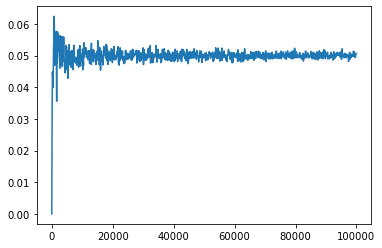

In [51]:
# The average of the group diverges into the probability of success
plt.plot(xs, ys)

# Practice!


#### Talk about this usecase:
* I have a button on site
* The probability that the client will click on it is 3% (because it's located in an inaccisble location)
* If in a specific day I have 1000 users - how many of them would click the button?

In [189]:
trials = 1000
prob = 0.03
size_ = 1

successes = np.random.binomial(n=trials, p = prob, size=size_)

#Switch between n and size - see the difference
successes_ = np.random.binomial(n=size_, p = prob, size=trials)

# Run this several times - show that the number changes - Let's talk about how this number changes
print(successes)
print(sum(successes_))

[22]
25


(array([2., 0., 1., 2., 1., 1., 0., 1., 0., 2.]),
 array([25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6, 36.2, 37.8, 39.4, 41. ]),
 <BarContainer object of 10 artists>)

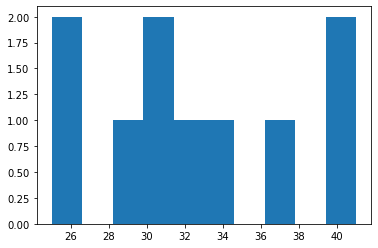

In [99]:
collector = []

for i in range(10):
    successes = np.random.binomial(n=trials, p = prob, size=size_)[0]
    collector.append(successes)

    
# plt.hist(collector) without a semicolon is cluttered
plt.hist(collector)

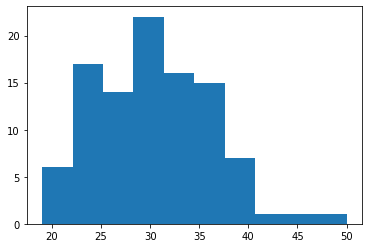

In [96]:
collector = []

for i in range(100):
    successes = np.random.binomial(n=trials, p = prob, size=size_)[0]
    collector.append(successes)
    
plt.hist(collector);

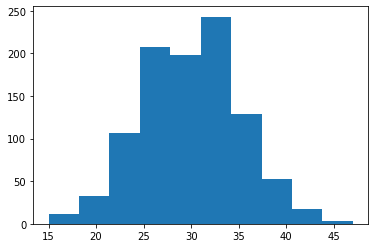

In [97]:
collector = []

for i in range(1000):
    successes = np.random.binomial(n=trials, p = prob, size=size_)[0]
    collector.append(successes)
    
plt.hist(collector);

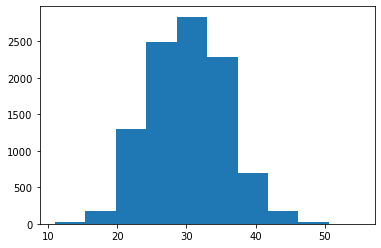

In [100]:
collector = []

# note the underscore in the number
for i in range(10_000):
    successes = np.random.binomial(n=trials, p = prob, size=size_)[0]
    collector.append(successes)
    
plt.hist(collector);

# Normal distribution is continous - Binomial is discrete

The main difference is that normal distribution is continous 
whereas binomial is discrete, but if there are enough data points it
 will be quite similar to normal distribution with certain loc and scale.



* I run a stand outside Lazy Dada's show and I sell merch
* The probability that the client will buy something on it is 36% 
* In a specifric show I have 250 groups of 10 people

In [129]:
sum(np.random.binomial(n=1, p = 0.36, size=100))

34

# Let's get back to coins!


I have 2 coins, one is fair, the other?
Maybe.


How can I determine if it's a fair coin?

* We will conduct a battery of 100 experiemnts
* In each experiment we will throw the 2 coins 1000 times
* and write down the probability of success 
* Then - We plot it, and see what we think

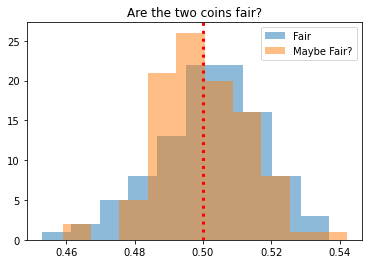

In [168]:
fc_collector = []
afc_collector = []

for i in range(100):
    fair_coin = np.random.binomial(n=1, p = 0.5, size=1000)
    another_fair_coin = np.random.binomial(n=1, p = 0.5, size=1000)
    
    fc_collector.append(sum(fair_coin)/len(fair_coin))
    afc_collector.append(sum(another_fair_coin)/len(another_fair_coin))

    
plt.title("Are the two coins fair?")
plt.hist(fc_collector, alpha=0.5, label="Fair");
plt.hist(afc_collector, alpha=0.5, label="Maybe Fair?");
plt.axvline(0.5, lw=3, c='r', ls=":")
plt.legend()

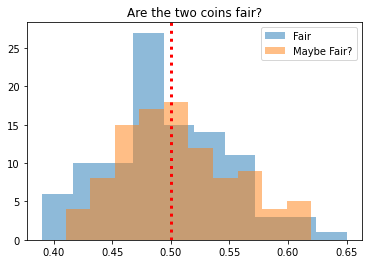

In [169]:
fc_collector = []
afc_collector = []

for i in range(100):
    fair_coin = np.random.binomial(n=1, p = 0.5, size=100)
    another_fair_coin = np.random.binomial(n=1, p = 0.505, size=100)
    
    fc_collector.append(sum(fair_coin)/len(fair_coin))
    afc_collector.append(sum(another_fair_coin)/len(another_fair_coin))

    
plt.title("Are the two coins fair?")
plt.hist(fc_collector, alpha=0.5, label="Fair");
plt.hist(afc_collector, alpha=0.5, label="Maybe Fair?");
plt.axvline(0.5, lw=3, c='r', ls=":")
plt.legend()

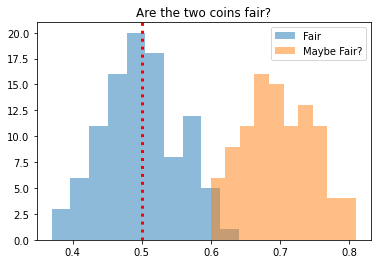

In [170]:
fc_collector = []
afc_collector = []

for i in range(100):
    fair_coin = np.random.binomial(n=1, p = 0.5, size=100)
    another_fair_coin = np.random.binomial(n=1, p = 0.7, size=100)
    
    fc_collector.append(sum(fair_coin)/len(fair_coin))
    afc_collector.append(sum(another_fair_coin)/len(another_fair_coin))

    
plt.title("Are the two coins fair?")
plt.hist(fc_collector, alpha=0.5, label="Fair");
plt.hist(afc_collector, alpha=0.5, label="Maybe Fair?");
plt.axvline(0.5, lw=3, c='r', ls=":")
plt.legend()

# How confident are we?

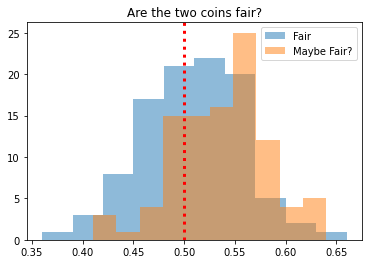

In [173]:
fc_collector = []
afc_collector = []

for i in range(100):
    fair_coin = np.random.binomial(n=1, p = 0.5, size=100)
    another_fair_coin = np.random.binomial(n=1, p = 0.535, size=100)
    
    fc_collector.append(sum(fair_coin)/len(fair_coin))
    afc_collector.append(sum(another_fair_coin)/len(another_fair_coin))

    
plt.title("Are the two coins fair?")
plt.hist(fc_collector, alpha=0.5, label="Fair");
plt.hist(afc_collector, alpha=0.5, label="Maybe Fair?");
plt.axvline(0.5, lw=3, c='r', ls=":")
plt.legend()

In [ ]:
# Same coins - we toss 10k times in each experiemnt

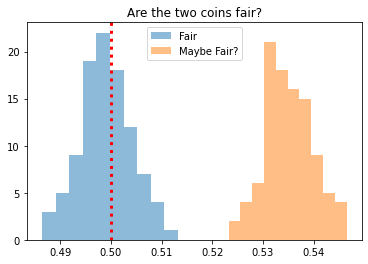

In [178]:
fc_collector = []
afc_collector = []

for i in range(100):
    fair_coin = np.random.binomial(n=1, p = 0.5, size=10_000)
    another_fair_coin = np.random.binomial(n=1, p = 0.535, size=10_000)
    
    fc_collector.append(sum(fair_coin)/len(fair_coin))
    afc_collector.append(sum(another_fair_coin)/len(another_fair_coin))

    
plt.title("Are the two coins fair?")
plt.hist(fc_collector, alpha=0.5, label="Fair");
plt.hist(afc_collector, alpha=0.5, label="Maybe Fair?");
plt.axvline(0.5, lw=3, c='r', ls=":")
plt.legend()